In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer


In [ ]:
df = pd.read_csv('BlackFriday.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
df.info()
#to get information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [ ]:
df.isna().sum()

#more than 50% of data has null values so we cannot drop them

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,166986


In [ ]:
#we are removing those categories with null values as they are not giving any important infomration
del df['Product_Category_2']
del df['Product_Category_3']


In [ ]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,7172


In [ ]:
#analyzing columns in the data set

df['Product_ID'].nunique()

3623

In [ ]:
df['User_ID'].nunique()
#unique users

5891

In [ ]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [ ]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [ ]:
df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

In [ ]:

df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [ ]:
for col in df.columns:
    print(col,':', df[col].nunique(), df[col].unique())

User_ID : 5891 [1000001 1000002 1000003 ... 1004113 1005391 1001529]
Product_ID : 3623 ['P00069042' 'P00248942' 'P00087842' ... 'P00038842' 'P00295642'
 'P00091742']
Gender : 2 ['F' 'M']
Age : 7 ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
Occupation : 21 [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
City_Category : 3 ['A' 'C' 'B']
Stay_In_Current_City_Years : 5 ['2' '4+' '3' '1' '0']
Marital_Status : 2 [0 1]
Product_Category_1 : 18 [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9]
Purchase : 17959 [ 8370 15200  1422 ... 14539 11120 18426]


In [ ]:
data = pd.DataFrame({'Ratio': [len(df[df['Gender']=='M']), len(df[df['Gender']=='F'])]})
data

,Ratio
0,405380
1,132197


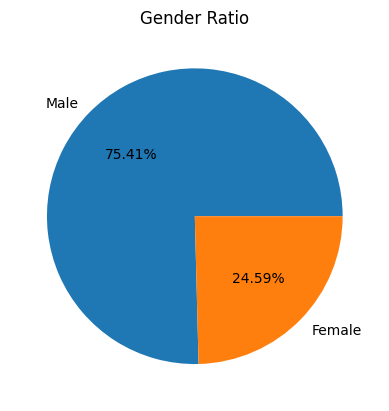

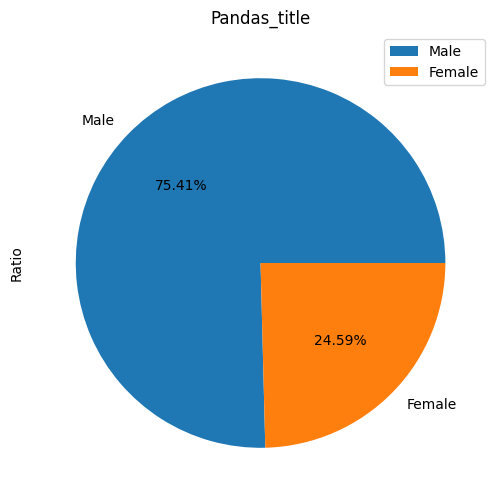

In [ ]:
plt.pie(data['Ratio'], autopct = '%0.2f%%', labels = ['Male', 'Female'])
plt.title('Gender Ratio')
plt.show()


#other way

data.plot.pie(y = 'Ratio', autopct = '%0.2f%%', figsize = (6,6), labels = ['Male', 'Female'],title = 'Pandas_title')
plt.show()



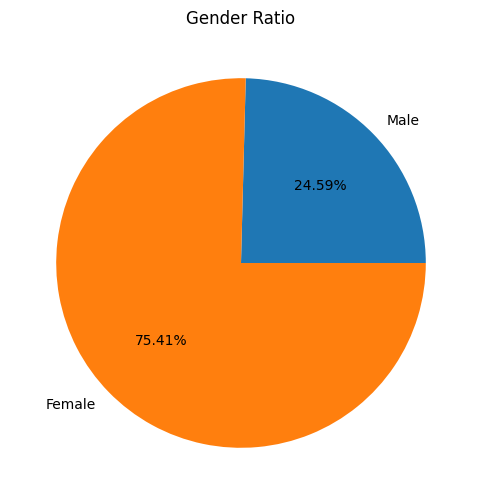

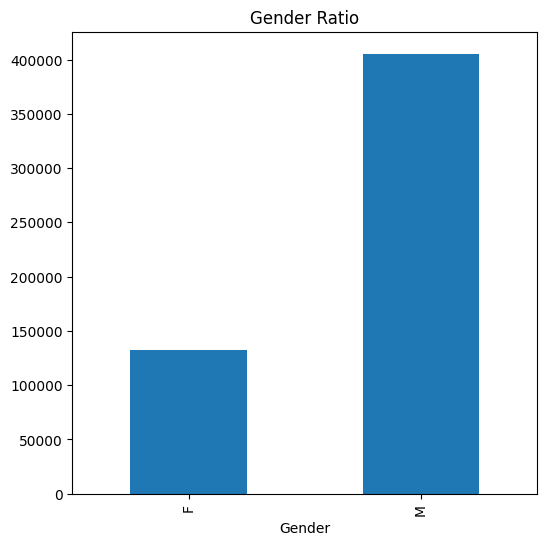

In [ ]:
df.groupby('Gender').size().plot(kind = 'pie', autopct = '%0.2f%%', labels = ['Male', 'Female'],title = 'Gender Ratio', figsize = (6,6))
plt.show()

df.groupby('Gender').size().plot(kind = 'bar',title = 'Gender Ratio', figsize = (6,6))
plt.show()

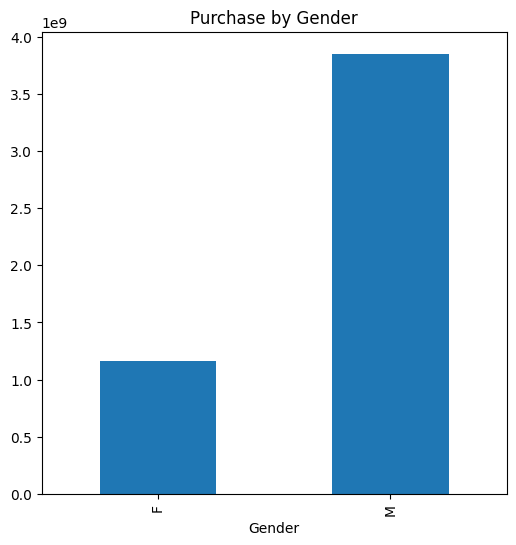

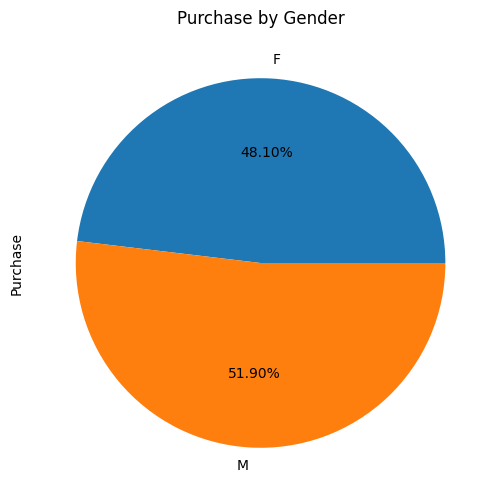

In [ ]:
df.groupby('Gender')['Purchase'].sum().plot(kind = 'bar', title = 'Purchase by Gender', figsize = (6,6))
plt.show()

#male spend more money compared to female

df.groupby('Gender')['Purchase'].mean().plot(kind = 'pie', autopct = '%.2f%%', title = 'Purchase by Gender', figsize = (6,6))
plt.show()

#avg both female and male spend same
#but as we have male making more purchases they spent more money in previous graph

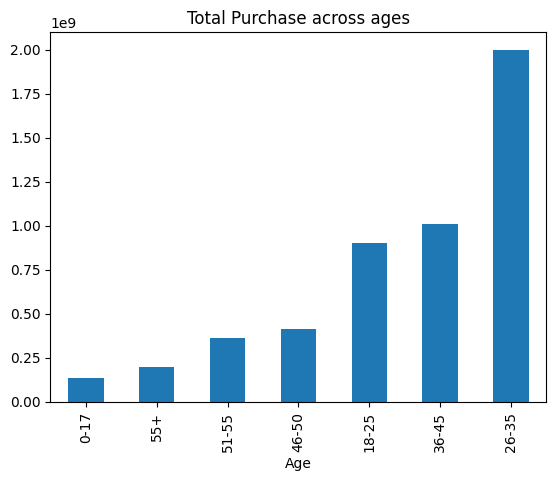

In [ ]:
df.groupby('Age')['Purchase'].sum().sort_values(ascending=True).plot(kind = 'bar', title = 'Purchase by Age')
plt.title('Total Purchase across ages')
plt.show()

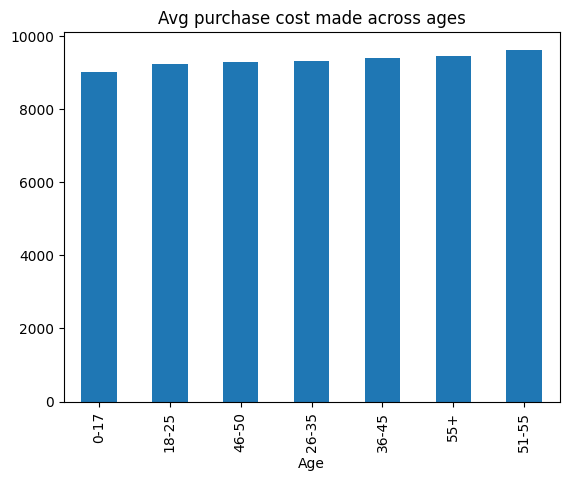

In [ ]:
df.groupby('Age')['Purchase'].mean().sort_values(ascending=True).plot(kind = 'bar', title = 'Purchase by Age')
plt.title('Avg purchase cost made across ages')
plt.show()

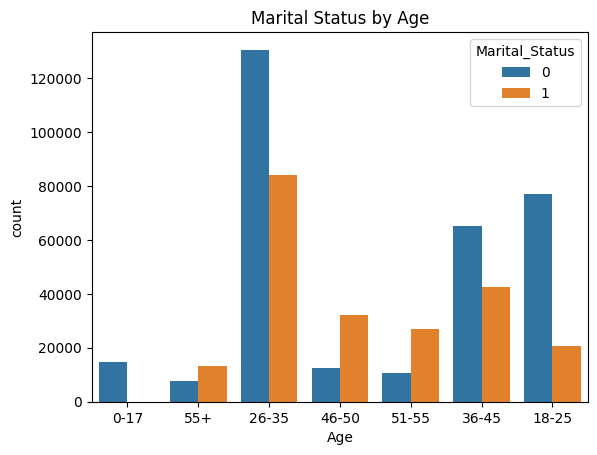

In [ ]:
sns.countplot(data = df, x = 'Age', hue = 'Marital_Status')
plt.title('Marital Status by Age')
plt.show()

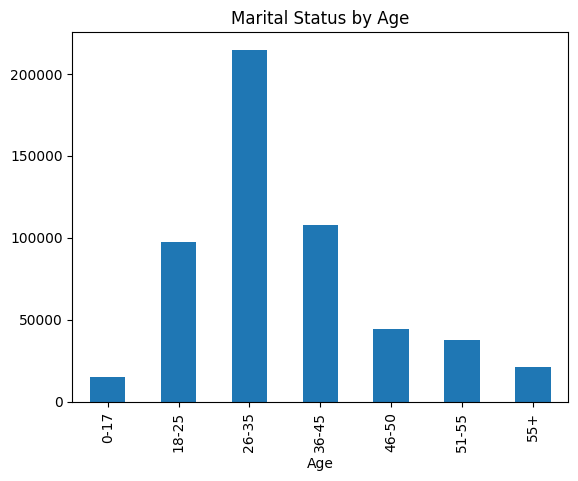

In [ ]:
#analysing age and marital status

df.groupby('Age')['Marital_Status'].count().plot(kind = 'bar')
plt.title('Marital Status by Age')
plt.show()



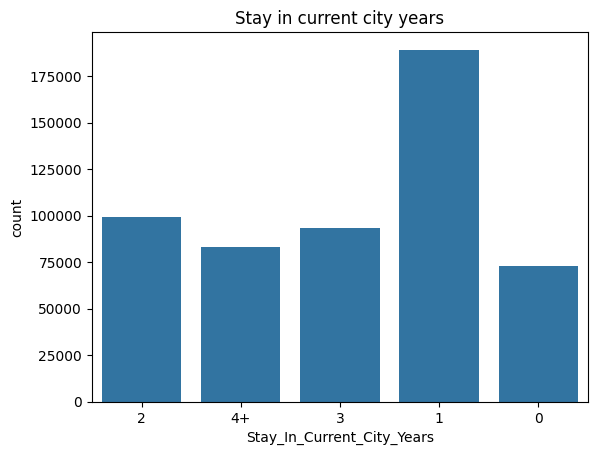

In [ ]:
#Stay_In_Current_City_Years column analysis

sns.countplot(data = df, x = 'Stay_In_Current_City_Years')
plt.title('Stay in current city years')
plt.show()

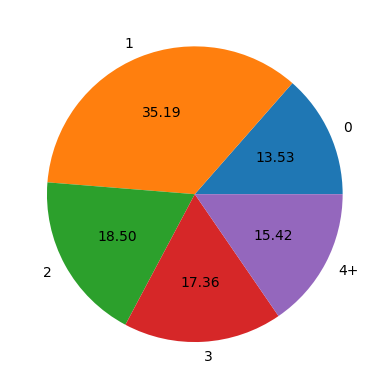

In [ ]:
df.groupby('Stay_In_Current_City_Years').size().plot(kind = 'pie', autopct = '%0.2f')

plt.show()

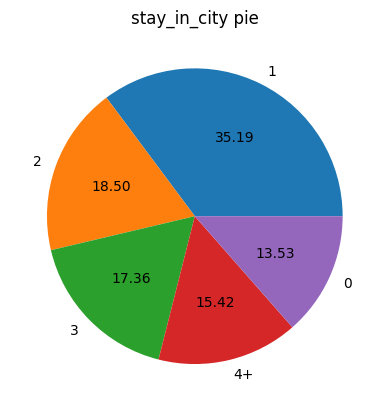

In [ ]:
stay_in_city = df['Stay_In_Current_City_Years'].value_counts()
plt.pie(x= stay_in_city, labels = stay_in_city.index, autopct = '%0.2f')
plt.title('stay_in_city pie')
plt.show()


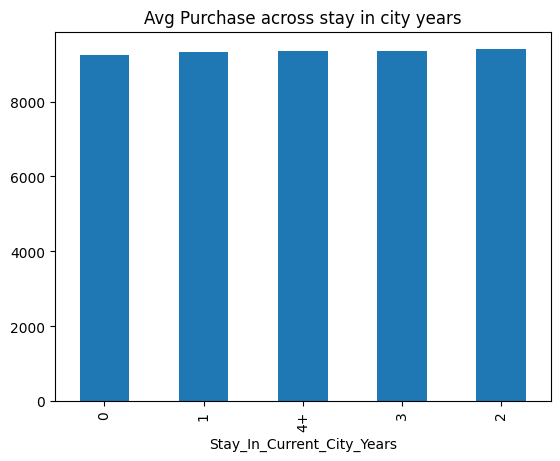

In [ ]:
df.groupby('Stay_In_Current_City_Years')['Purchase'].mean().sort_values(ascending=True).plot(kind = 'bar', title = 'Purchase by Age')
plt.title('Avg Purchase across stay in city years')
plt.show()

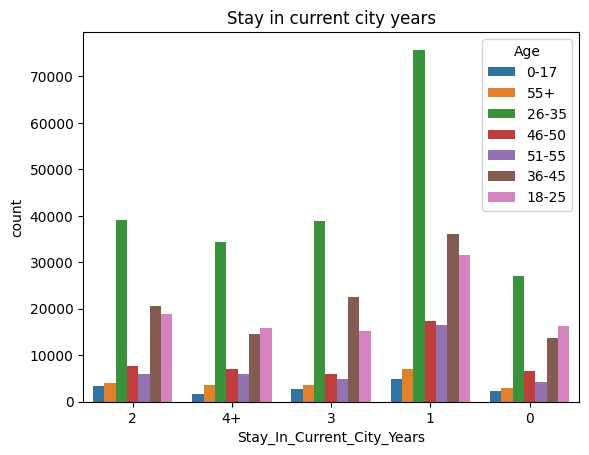

In [ ]:
sns.countplot(data = df, x = 'Stay_In_Current_City_Years', hue = 'Age')
plt.title('Stay in current city years')
plt.show()

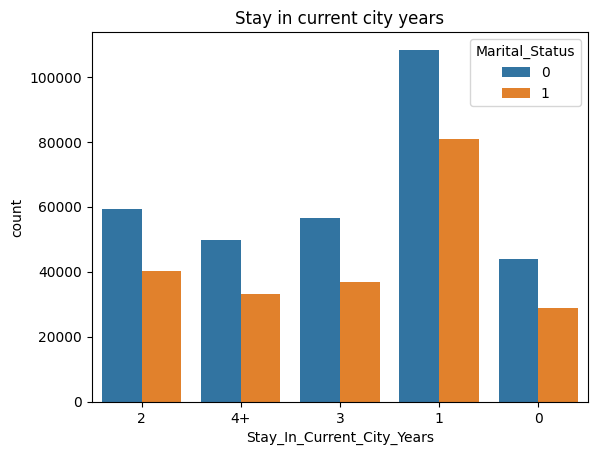

In [ ]:
sns.countplot(data = df, x = 'Stay_In_Current_City_Years', hue = 'Marital_Status')
plt.title('Stay in current city years')
plt.show()

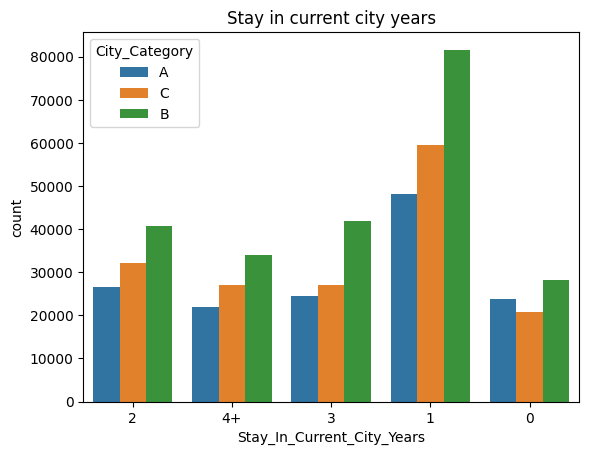

In [ ]:
sns.countplot(data = df, x = 'Stay_In_Current_City_Years', hue = 'City_Category')
plt.title('Stay in current city years')
plt.show()

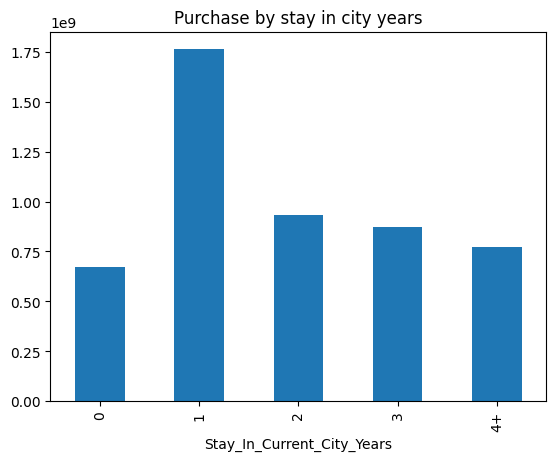

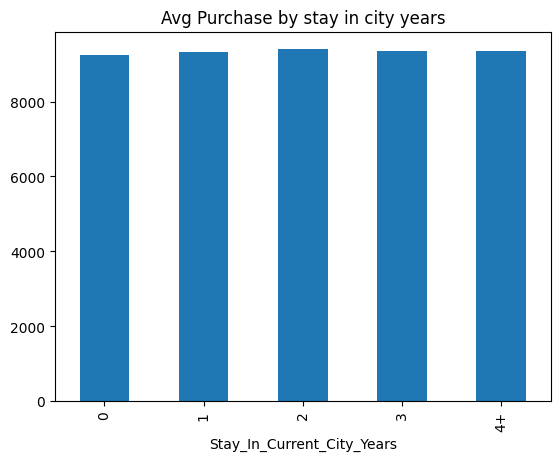

In [ ]:
#avag and total purchase made wrt stay in city

df.groupby('Stay_In_Current_City_Years')['Purchase'].sum().plot(kind = 'bar', title = 'Purchase by stay in city years')


plt.show()

df.groupby('Stay_In_Current_City_Years')['Purchase'].mean().plot(kind = 'bar', title = 'Avg Purchase by stay in city years')

plt.show()

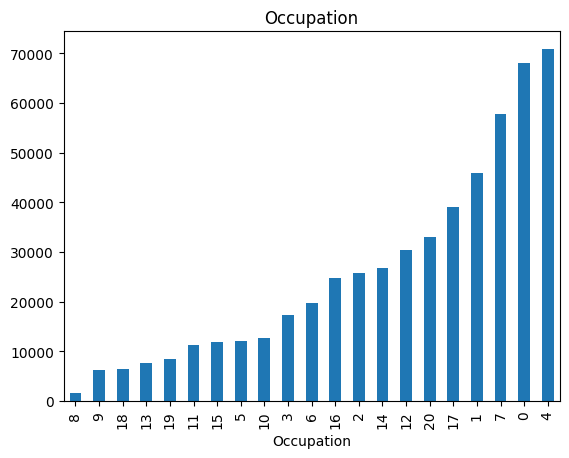

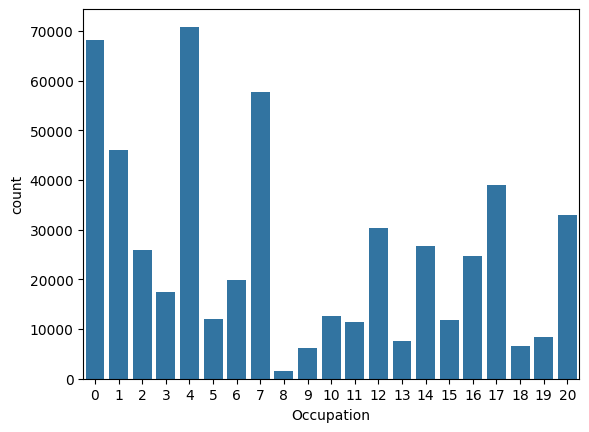

In [ ]:
#Occupation product analysis

df.groupby('Occupation').size().sort_values().plot(kind = 'bar', title = 'Occupation')
plt.show()

#occupation 4 bought more products

sns.countplot(data = df, x = 'Occupation')
plt.show()

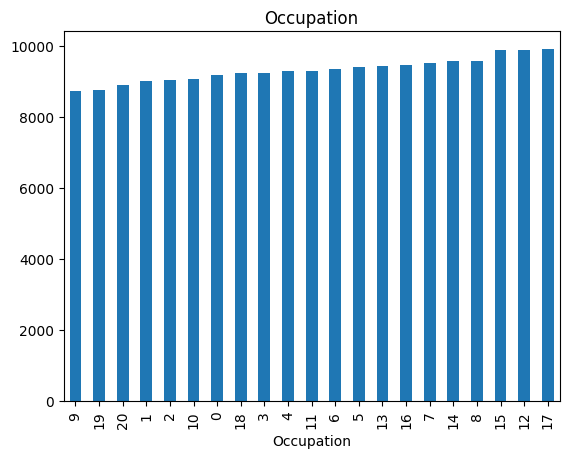

In [ ]:
df.groupby('Occupation')['Purchase'].mean().sort_values().plot(kind = 'bar', title = 'Occupation')
plt.show()

#occupation 17 bought more expensive products

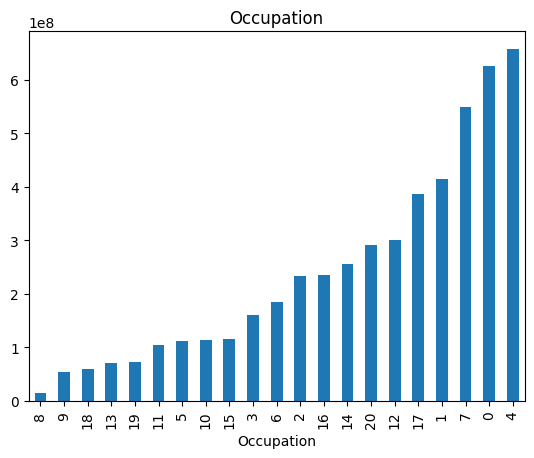

In [ ]:
df.groupby('Occupation')['Purchase'].sum().sort_values().plot(kind = 'bar', title = 'Occupation')
plt.show()
#occupation 4 spent more money as they bought more products as seen in previous graphs

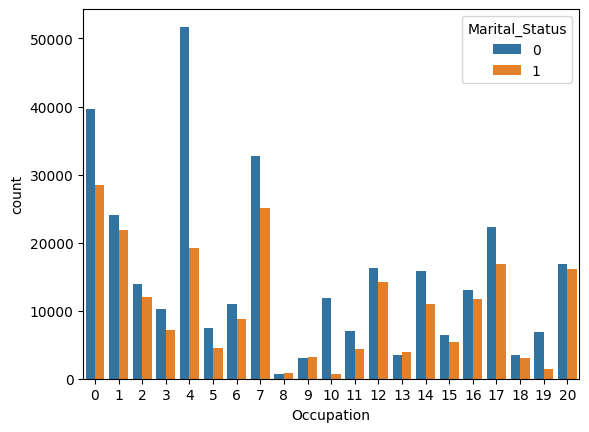

In [ ]:
sns.countplot(data = df, x = 'Occupation', hue = 'Marital_Status')
plt.show()

#there are mostly unammried people in the categories who made more purchases

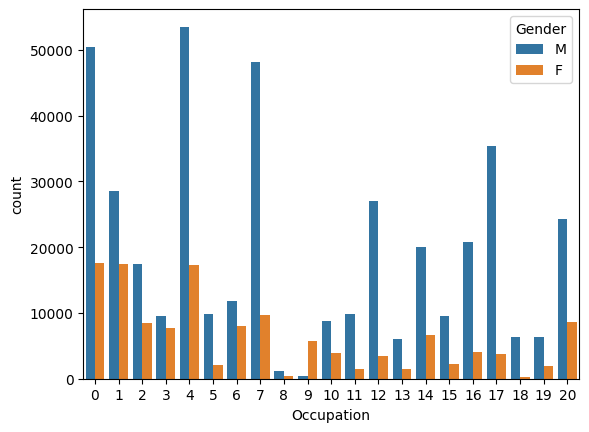

In [ ]:
sns.countplot(data = df, x = 'Occupation', hue = 'Gender')
plt.show()

#there are mostly male in the most purchased occupations


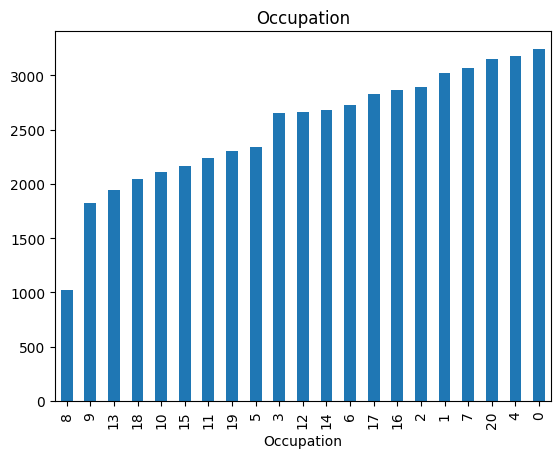

In [ ]:
df.groupby('Occupation')['Product_ID'].nunique().sort_values().plot(kind = 'bar', title = 'Occupation')
plt.show()
#occupation 0 bought most products

<Axes: xlabel='Product_Category_1'>

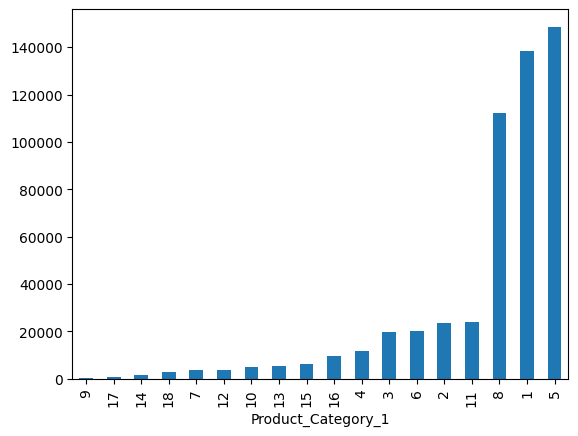

In [ ]:
df.groupby('Product_Category_1').size().sort_values().plot(kind = 'bar')
#1,8,5 has best sellers in their category

<Axes: xlabel='Product_Category_1'>

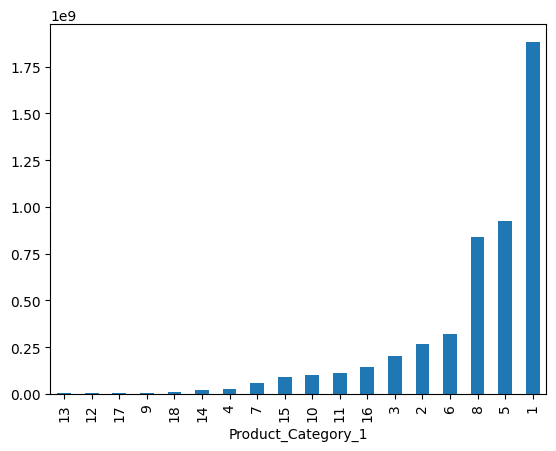

In [ ]:
df.groupby('Product_Category_1')['Purchase'].sum().sort_values().plot(kind = 'bar')

<Axes: xlabel='Product_Category_1'>

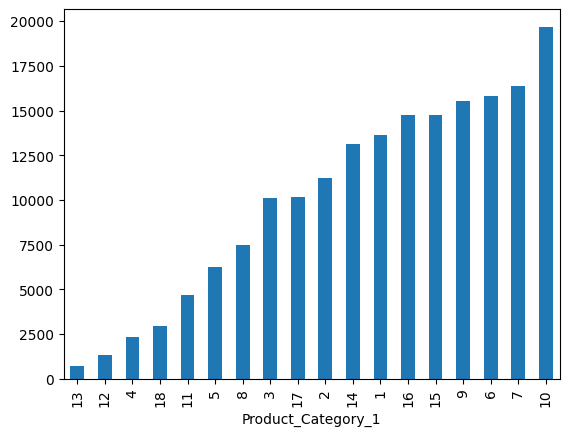

In [ ]:
df.groupby('Product_Category_1')['Purchase'].mean().sort_values().plot(kind = 'bar')

#category 13 is the least expensive product

<Axes: xlabel='Product_ID'>

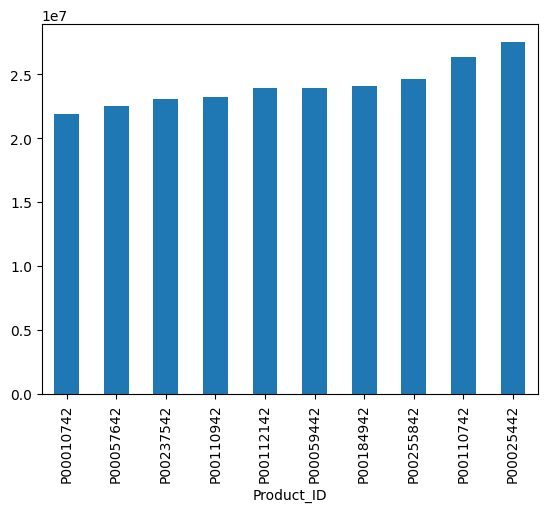

In [ ]:
df.groupby('Product_ID')['Purchase'].sum().nlargest(10).sort_values().plot(kind = 'bar')

<Axes: xlabel='Product_ID'>

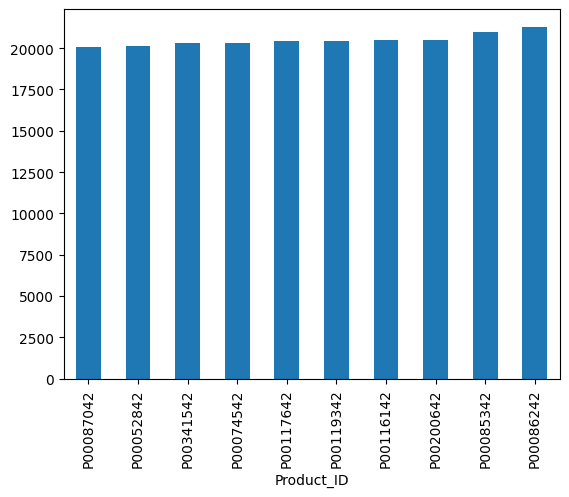

In [ ]:
df.groupby('Product_ID')['Purchase'].mean().nlargest(10).sort_values().plot(kind = 'bar')

<Axes: xlabel='Product_ID'>

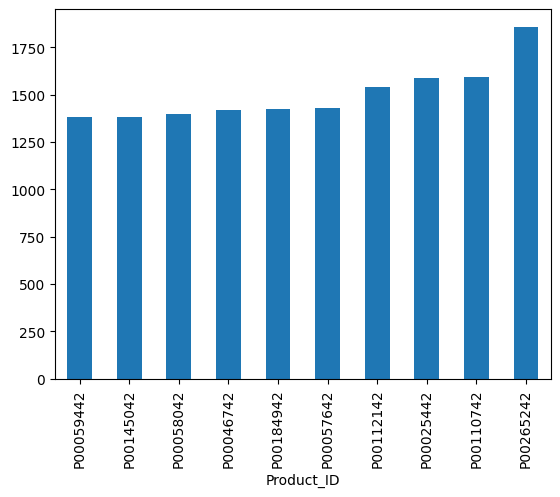

In [ ]:
df.groupby('Product_ID').size().nlargest(10).sort_values().plot(kind = 'bar')

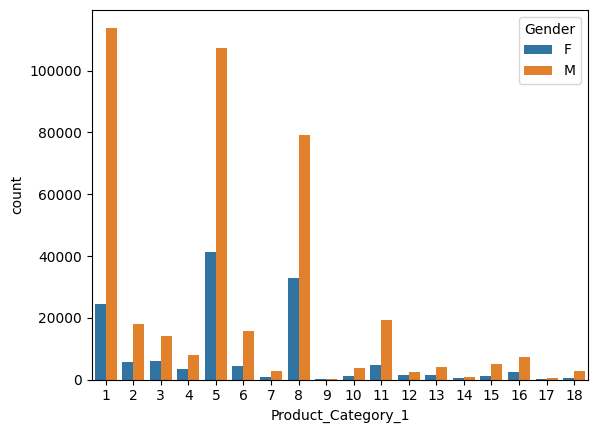

In [ ]:
sns.countplot(data = df, x = 'Product_Category_1', hue = 'Gender')
plt.show()

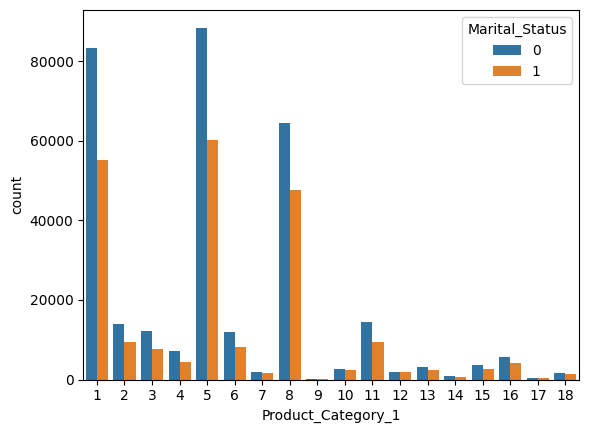

In [ ]:
sns.countplot(data = df, x = 'Product_Category_1', hue = 'Marital_Status')
plt.show()

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
#combining gender and marital
gm = []
for i in range(len(df)):
  gm.append(df['Gender'][i]+str(df['Marital_Status'][i]))

df['Gender_Marital'] = gm
df.head()



,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,Gender_Marital
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,F0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,F0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,F0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,F0
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,M0


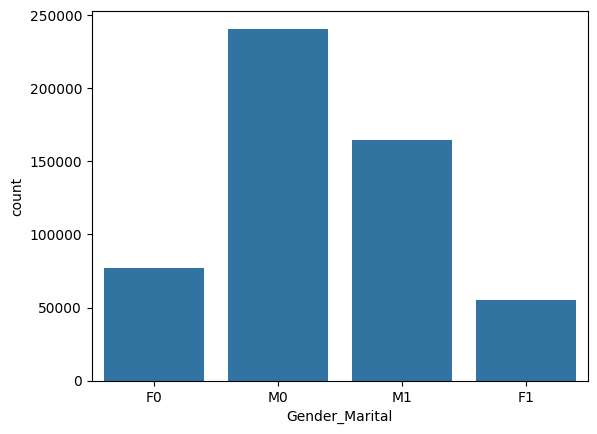

In [ ]:
sns.countplot(data = df, x = 'Gender_Marital')
plt.show()

#male unamarried and married are making more purchases

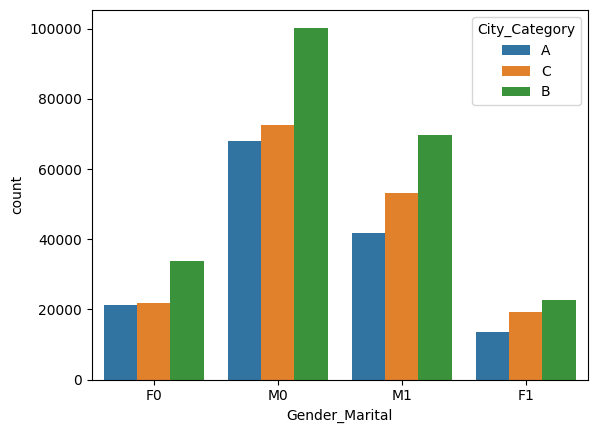

In [ ]:
sns.countplot(data = df, x = 'Gender_Marital', hue = 'City_Category')
plt.show()


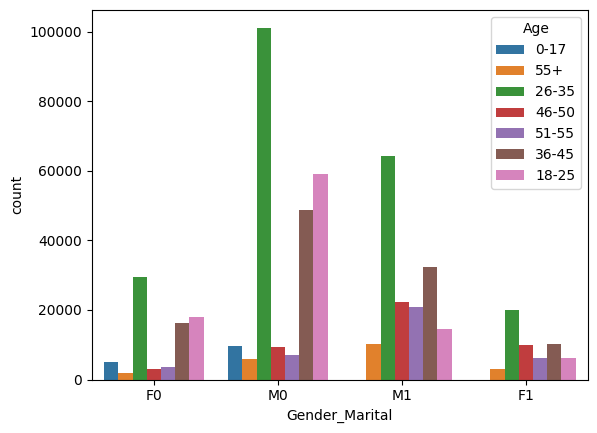

In [ ]:
sns.countplot(data = df, x = 'Gender_Marital', hue = 'Age')
plt.show()

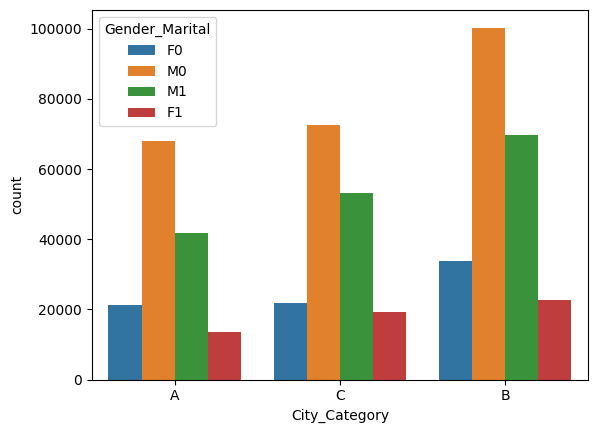

In [ ]:
sns.countplot(data = df, x = 'City_Category', hue = 'Gender_Marital')
plt.show()


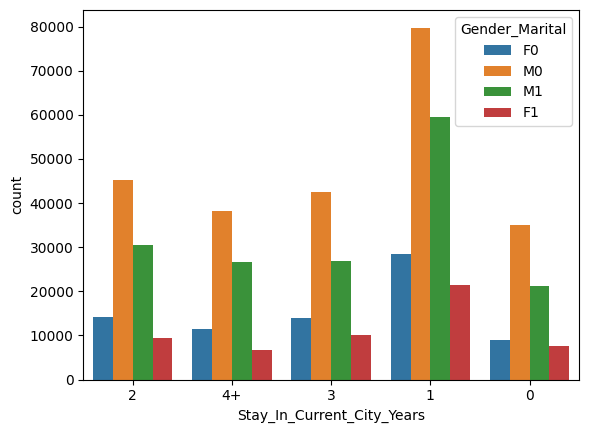

In [ ]:
sns.countplot(data = df, x = 'Stay_In_Current_City_Years', hue = 'Gender_Marital')
plt.show()

In [ ]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [ ]:
df['Age_n'] = np.nan

for i in range(len(df)):
  if(df['Age'][i] == '0-17'):
    df['Age_n'][i] = 'Kids'
  elif(df['Age'][i] == '18-25' or df['Age'][i] == '26-35'):
    df['Age_n'][i] = 'Adults'
  else:
    df['Age_n'][i] = 'Old'
df.head()

<ipython-input-65-814c6503a694>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Age_n'][i] = 'Kids'
<ipython-input-65-814c6503a694>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the c

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,Gender_Marital,Age_n
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,F0,Kids
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,F0,Kids
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,F0,Kids
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,F0,Kids
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,M0,Old


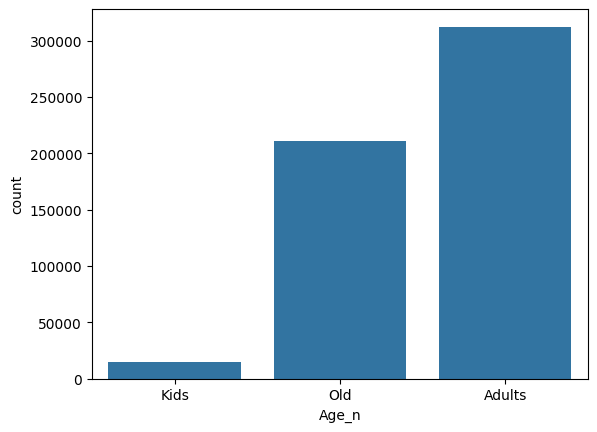

In [ ]:
sns.countplot(data = df, x = 'Age_n')
plt.show()

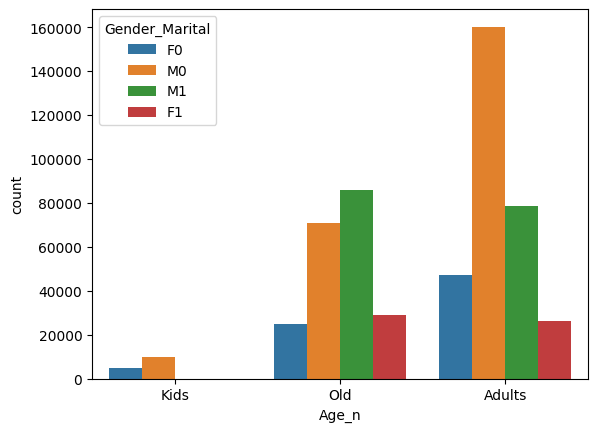

In [ ]:
sns.countplot(data = df, x = 'Age_n', hue = 'Gender_Marital')
plt.show()

<Axes: xlabel='Age_n'>

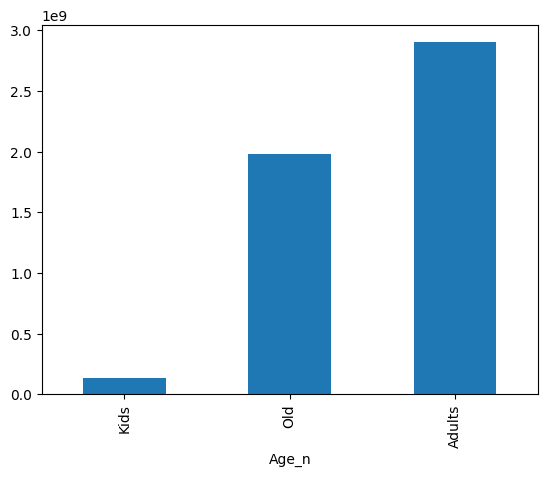

In [ ]:
df.groupby('Age_n')['Purchase'].sum().sort_values().plot(kind = 'bar')

<Axes: xlabel='Age_n'>

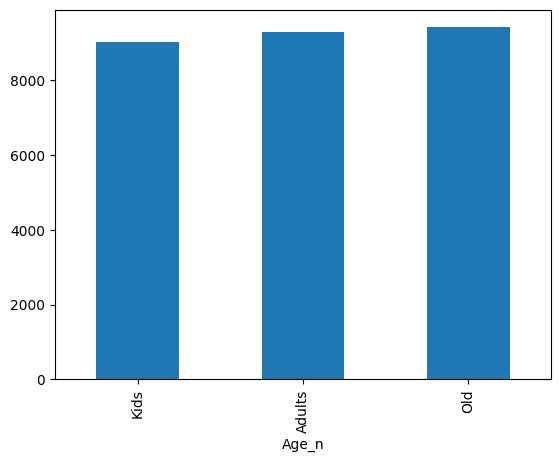

In [ ]:
df.groupby('Age_n')['Purchase'].mean().sort_values().plot(kind = 'bar')